In [1]:
import numpy as np
import pyscf
from pyscf.pbc import gto, scf, dft

In [2]:
import matplotlib.pyplot as plt

In [59]:
d = 1.42 # A
m, r = 31, 1
theta = np.arccos((3*m*m + 3*m*r + r*r/2) / (3*m*m + 3*m*r + r*r))
L = d * np.sqrt(3) / (2 * np.sin(theta/2.))
delta = np.array([[0., 0.], [0., d]])
tau0 = d * np.sqrt(3) * np.array([[np.sqrt(3)/2., 0.5],[1., 0.]])
a = np.sqrt(3) * d * np.array([[1., 0.], [0.5, np.sqrt(3)/2.]])

In [60]:
mn = np.array(np.meshgrid(np.arange(-5,5), np.arange(-5, 5))).reshape(2, -1).T

In [61]:
pts = np.tensordot(a, mn, [0,1])

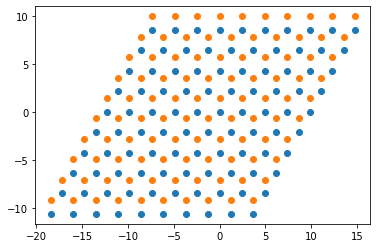

In [62]:
for d in delta:
    sl = (pts.T + d).T
    plt.scatter(sl[0], sl[1])

In [63]:
a_str = f"{a[0][0]} {a[0][1]} 0.0" + '\n' + f"{a[1][0]} {a[1][1]} 0.0"
atom_str = f"C {delta[0][0]} {delta[0][1]} 0.0\nC {delta[1][0]} {delta[1][1]} 0.0"

In [64]:
a_adjusted = np.zeros((3,3))
a_adjusted[:2,:2] = a
a_adjusted[2,2] = 10


In [65]:
a_adjusted

array([[ 2.45951215,  0.        ,  0.        ],
       [ 1.22975607,  2.13      ,  0.        ],
       [ 0.        ,  0.        , 10.        ]])

In [66]:
cell = gto.M(
    atom = atom_str,
    pseudo = 'gth-pade',
    basis = 'gth-szv',
    a = a_adjusted,
    precision = 1.e-10,
)
cell.build()


In [76]:
kmf = dft.KRKS(cell, kpts=cell.make_kpts([2,2,1]))
kmf = scf.addons.smearing_(kmf, sigma=0.01, method='fermi').run()
# overlap = kmf.get_ovlp() get_fock get_hcore

Overwritten attributes  get_occ get_grad energy_tot  of <class 'pyscf.pbc.dft.krks.KRKS'>



WARN: HOMO 5.54078933232 == LUMO 5.54078990786


WARN: HOMO 5.126753175 == LUMO 5.12675353572


WARN: HOMO 5.16930833113 == LUMO 5.16930851745


WARN: HOMO 5.16920709481 == LUMO 5.1692071342


WARN: HOMO 5.16920887256 == LUMO 5.16920893189


WARN: HOMO 5.16920897037 == LUMO 5.16920903199


WARN: HOMO 5.16966252316 == LUMO 5.16966267696


WARN: HOMO 5.16965316953 == LUMO 5.16965318973


WARN: HOMO 5.16866633977 == LUMO 5.16866634976


WARN: HOMO 5.16866661245 == LUMO 5.16866665305


WARN: HOMO 5.16866645699 == LUMO 5.16866647162


WARN: HOMO 5.16866660221 == LUMO 5.16866661841


WARN: HOMO 5.16866661364 == LUMO 5.16866677268


WARN: HOMO 5.16866667393 == LUMO 5.1686667164


WARN: HOMO 5.16866663114 == LUMO 5.16866675


WARN: HOMO 5.16866698431 == LUMO 5.16866702326


WARN: HOMO 5.16866703386 == LUMO 5.16866704109


WARN: HOMO 5.16866704806 == LUMO 5.16866705097


WARN: HOMO 5.16866704837 == LUMO 5.16866705245


WARN: HOMO 5.16866704452 == LUMO 5.16866704962


WARN: HOMO 5.16866682793 =

In [73]:
la.eigvalsh(overlap[3])

array([0.13780134, 0.18798731, 0.20746172, 0.61732677, 0.97224909,
       1.0269237 , 1.84609139, 2.73048579])

In [ ]:
k